In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My Drive/DeepLearningX/gitclone/light-weight-refinenet/src

/content/drive/My Drive/DeepLearningX/gitclone/light-weight-refinenet/src


In [0]:
# general libs
import argparse
import logging
import os
import random
import re
import sys
import time

# misc
import cv2
import numpy as np

# pytorch libs
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix

# custom libs
# from config import *
# from miou_utils import compute_iu, fast_cm
from util import *

In [0]:
import sys

sys.path.append("..")

from models.mobilenet import mbv2
from models.resnet import rf_lw50, rf_lw101, rf_lw152

from torchvision import transforms
from torch.utils.data import DataLoader, random_split
# Custom libraries
from datasets import NYUDataset as Dataset
from datasets import Pad, RandomCrop, RandomMirror, ResizeShorterScale, ToTensor, Normalise

In [0]:
mob = torch.load("/content/drive/My Drive/DeepLearningX/models/MobileNet/model_44")
mobFreeze = torch.load("/content/drive/My Drive/DeepLearningX/models/MobileNet/modelFreeze_17")

rest50 = torch.load("/content/drive/My Drive/DeepLearningX/models/ResNet/model_res50_unfreezed_23")
rest50Freeze = torch.load("/content/drive/My Drive/DeepLearningX/models/ResNet/model_res50_freezed_31")

rest101 = torch.load("/content/drive/My Drive/DeepLearningX/models/ResNet/model_res101_unfreezed_6")
rest101Freeze = torch.load("/content/drive/My Drive/DeepLearningX/models/ResNet/model_res101_freezed_31")

rest152 = torch.load("/content/drive/My Drive/DeepLearningX/models/ResNet/model_res152_unfreezed_54")
rest152Freeze = torch.load("/content/drive/My Drive/DeepLearningX/models/ResNet/model_res152_freezed_82")

In [0]:
models = [mob, mobFreeze, rest50, rest50Freeze, rest101, rest101Freeze, rest152, rest152Freeze]

In [0]:
images = []
labels = []
with open("/content/drive/My Drive/DeepLearningX/TrainData-People/Test/Test.txt", "r") as f:
  for line in f:
    im, label = line.strip().split("\t")
    images.append(im)
    labels.append(label)

In [0]:
import torchvision.transforms as T

In [0]:
trf = T.Compose([#T.Resize(imsize), 
                   #T.CenterCrop(imsize), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])

Infer the first five pictures to do qualitative evaluation

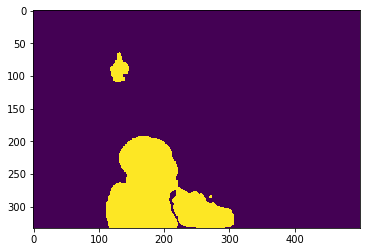

In [0]:
for i in range(5):
  img = Image.open(images[i])

  ten = trf(np.asarray(img)).unsqueeze(0)
  out = models[0](ten)
  num_classes = 2

  output = cv2.resize(out[0][[0,1]].data.cpu().numpy().transpose(1, 2, 0),
                                  ten.size()[2:][::-1],
                                  interpolation=cv2.INTER_CUBIC).argmax(axis=2).astype(np.uint8)
  plt.imshow(output)
  plt.savefig('/content/drive/My Drive/DeepLearningX/mobileNet_{}'.format(i))